In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Explorer

In [101]:
df = pd.read_csv("c:/Users/maria/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [103]:
df.shape

(200, 5)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [105]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [106]:
df.duplicated().all()

False

## Data Analysis & visualization

In [107]:
df.drop(['CustomerID'],inplace=True,axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [108]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [109]:
df.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [110]:
df.corr()

C:\Users\maria\AppData\Local\Temp\ipykernel_19300\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


C:\Users\maria\AppData\Local\Temp\ipykernel_19300\2643214532.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True , cmap='BrBG' )


<AxesSubplot: >

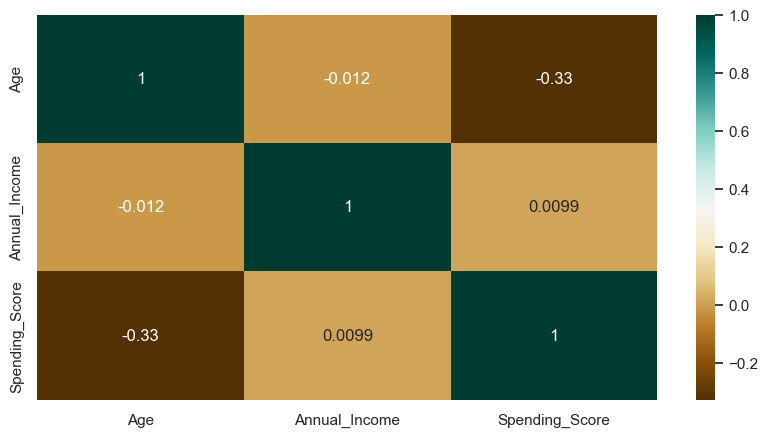

In [111]:
plt.figure()
sns.heatmap(df.corr(), annot=True , cmap='BrBG' )

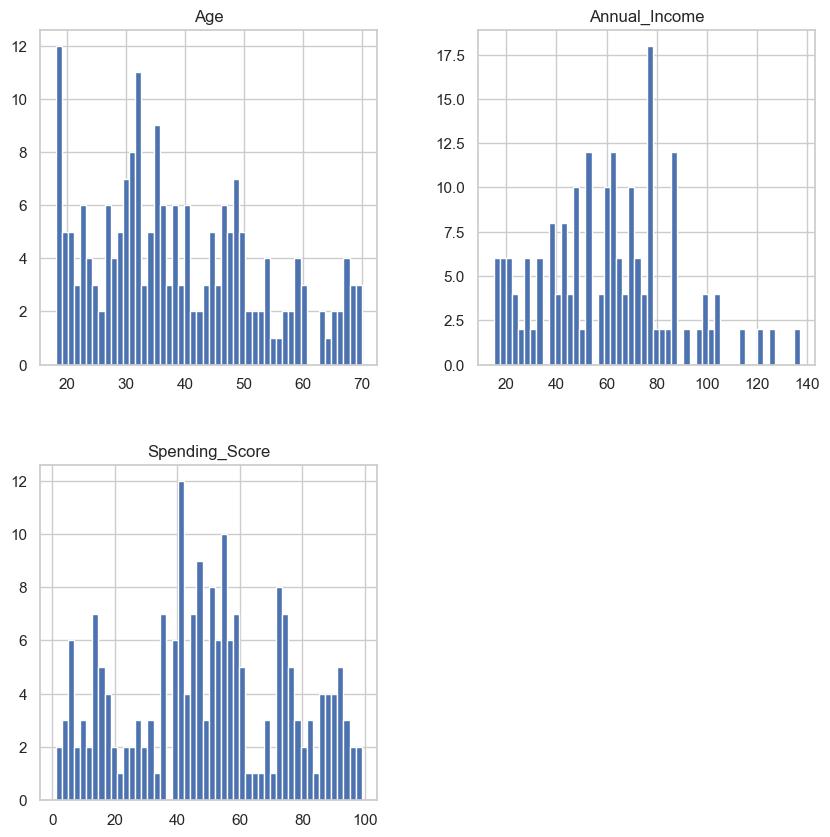

In [112]:
df.hist(bins=50, figsize=(10, 10))
plt.show()

In [113]:
gender_count = df['Gender'].value_counts(normalize=True)
gender_count.to_frame()

,Gender
Female,0.56
Male,0.44


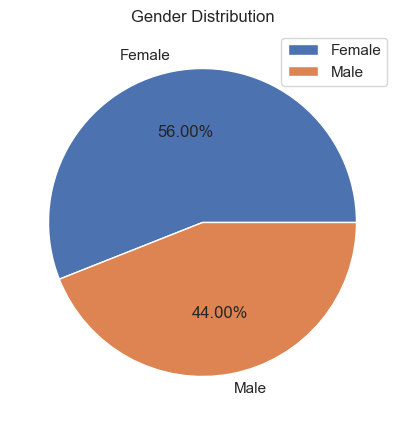

In [114]:
plt.pie(gender_count.values , autopct= '%.2f%%' ,labels= gender_count.index)
plt.title("Gender Distribution")

plt.legend(loc='best')

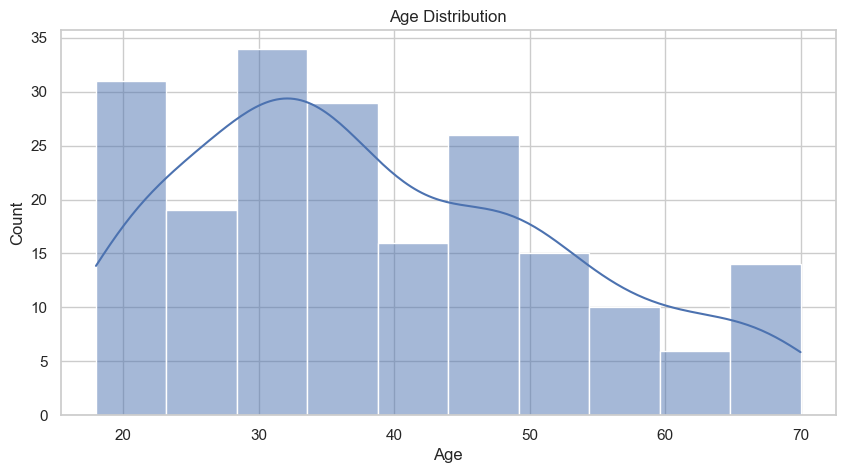

In [115]:
sns.histplot(df['Age'], bins=10, kde=True, color='b')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

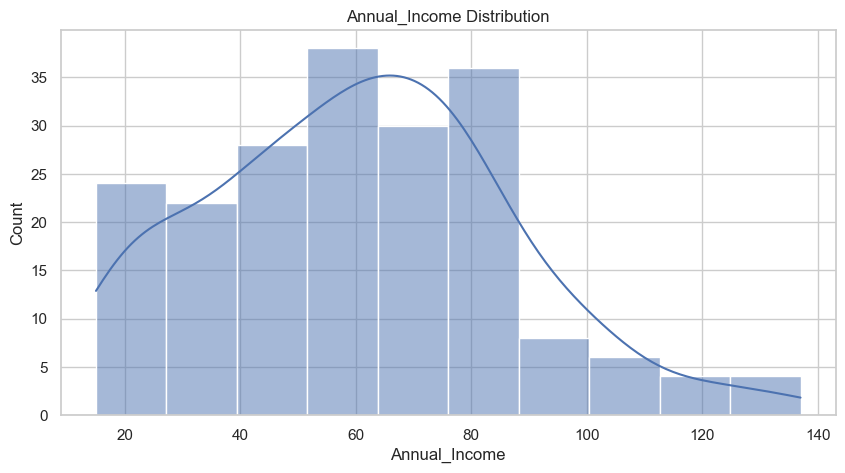

In [116]:
sns.histplot(df['Annual_Income'], bins=10, kde=True, color='b')
plt.xlabel('Annual_Income')
plt.ylabel('Count')
plt.title('Annual_Income Distribution')
plt.show()

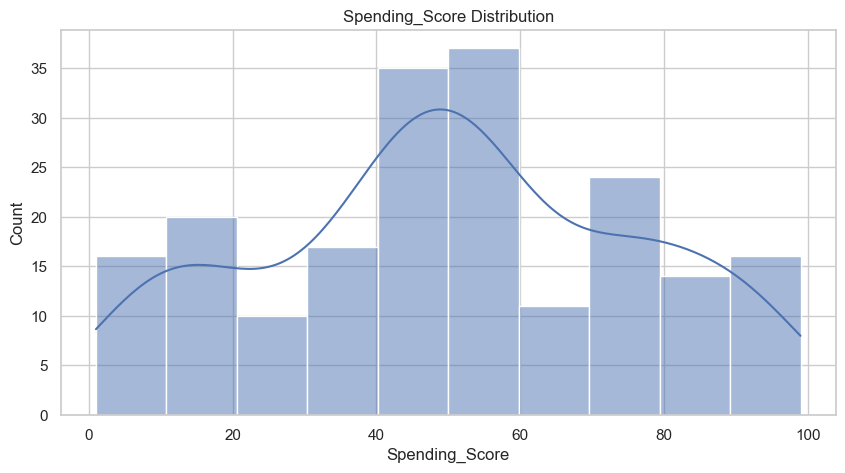

In [117]:
sns.histplot(df['Spending_Score'], bins=10, kde=True, color='b')
plt.xlabel('Spending_Score')
plt.ylabel('Count')
plt.title('Spending_Score Distribution')
plt.show()

<Figure size 1200x600 with 0 Axes>

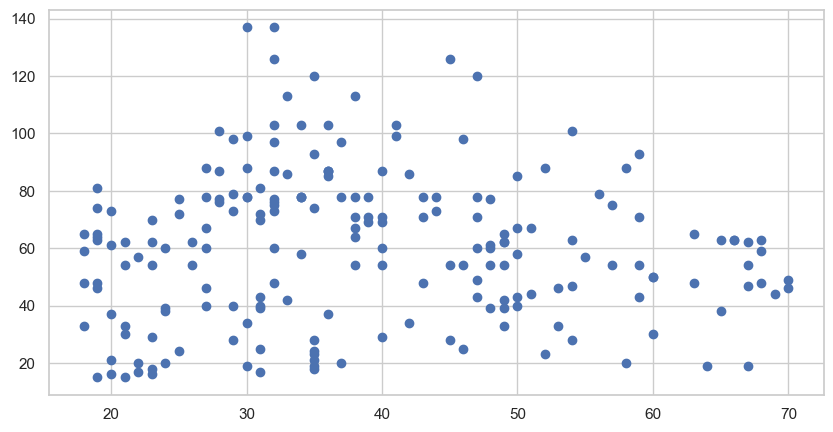

<Figure size 1200x600 with 0 Axes>

In [118]:
plt.scatter(df['Age'],df['Annual_Income'])
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

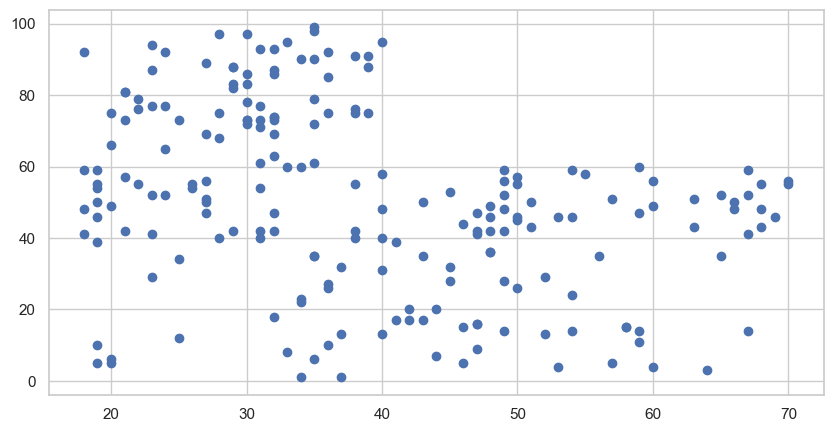

<Figure size 1200x600 with 0 Axes>

In [119]:
plt.scatter(df['Age'],df['Spending_Score'])
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

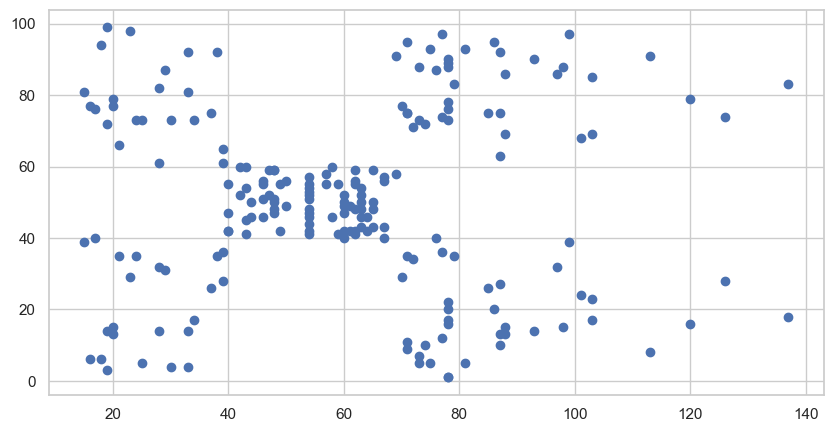

<Figure size 1200x600 with 0 Axes>

In [120]:
plt.scatter(df['Annual_Income'],df['Spending_Score'])
plt.figure(figsize=(12,6))

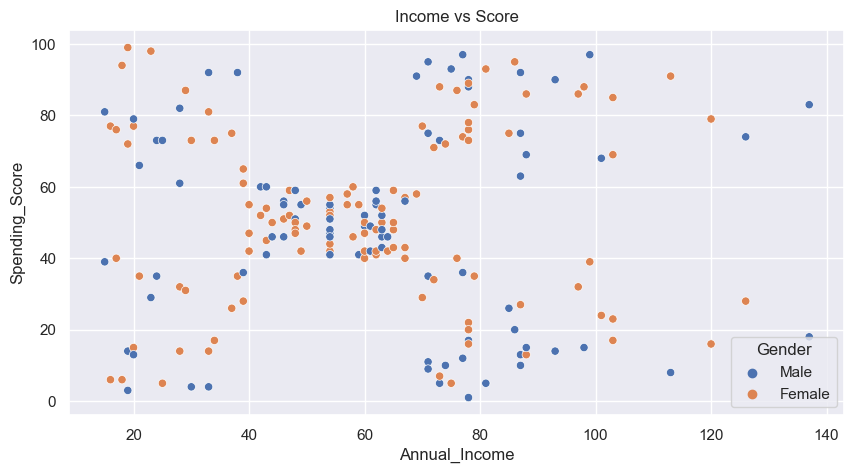

In [121]:
sns.set({"figure.figsize":(10,5)})
sns.scatterplot(data=df,x='Annual_Income',y='Spending_Score',hue="Gender")
plt.title('Income vs Score')
plt.show()

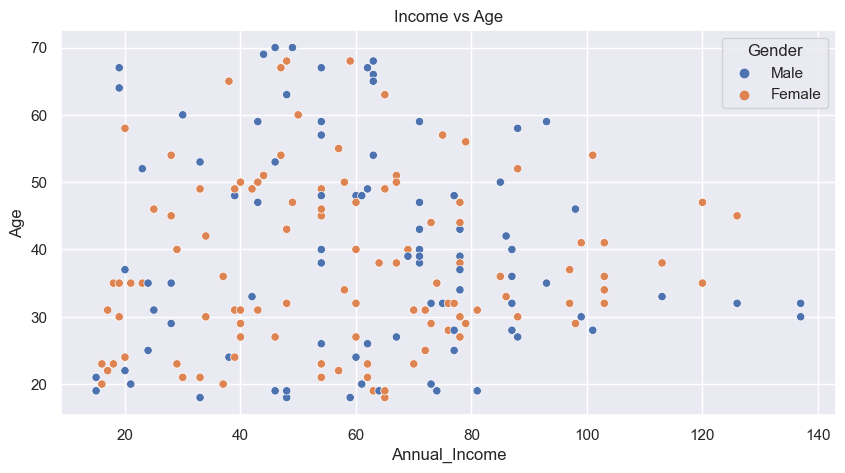

In [122]:
sns.set({"figure.figsize":(10,5)})
sns.scatterplot(data=df,x='Annual_Income',y='Age',hue="Gender")
plt.title('Income vs Age')
plt.show()

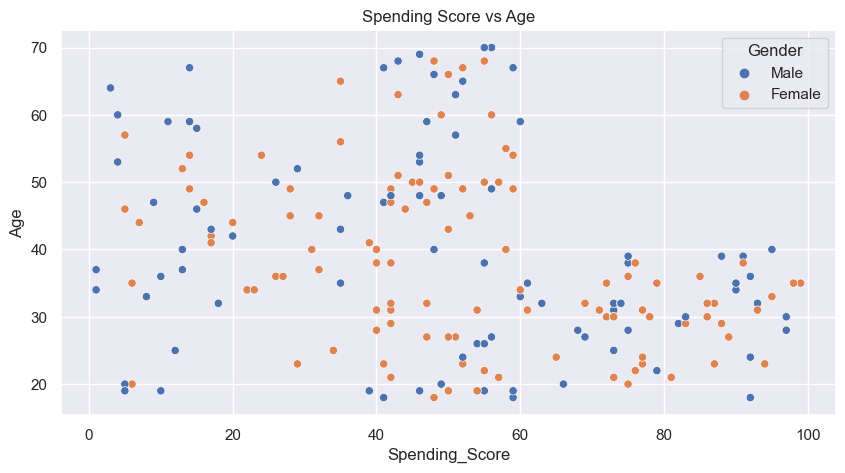

In [123]:
sns.set({"figure.figsize":(10,5)})
sns.scatterplot(data=df,x='Spending_Score',y='Age',hue="Gender")
plt.title('Spending Score vs Age')
plt.show()

In [124]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
  if df[i].dtypes=='O':
    df[i]=le.fit_transform(df[i])
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Detecting Outliers

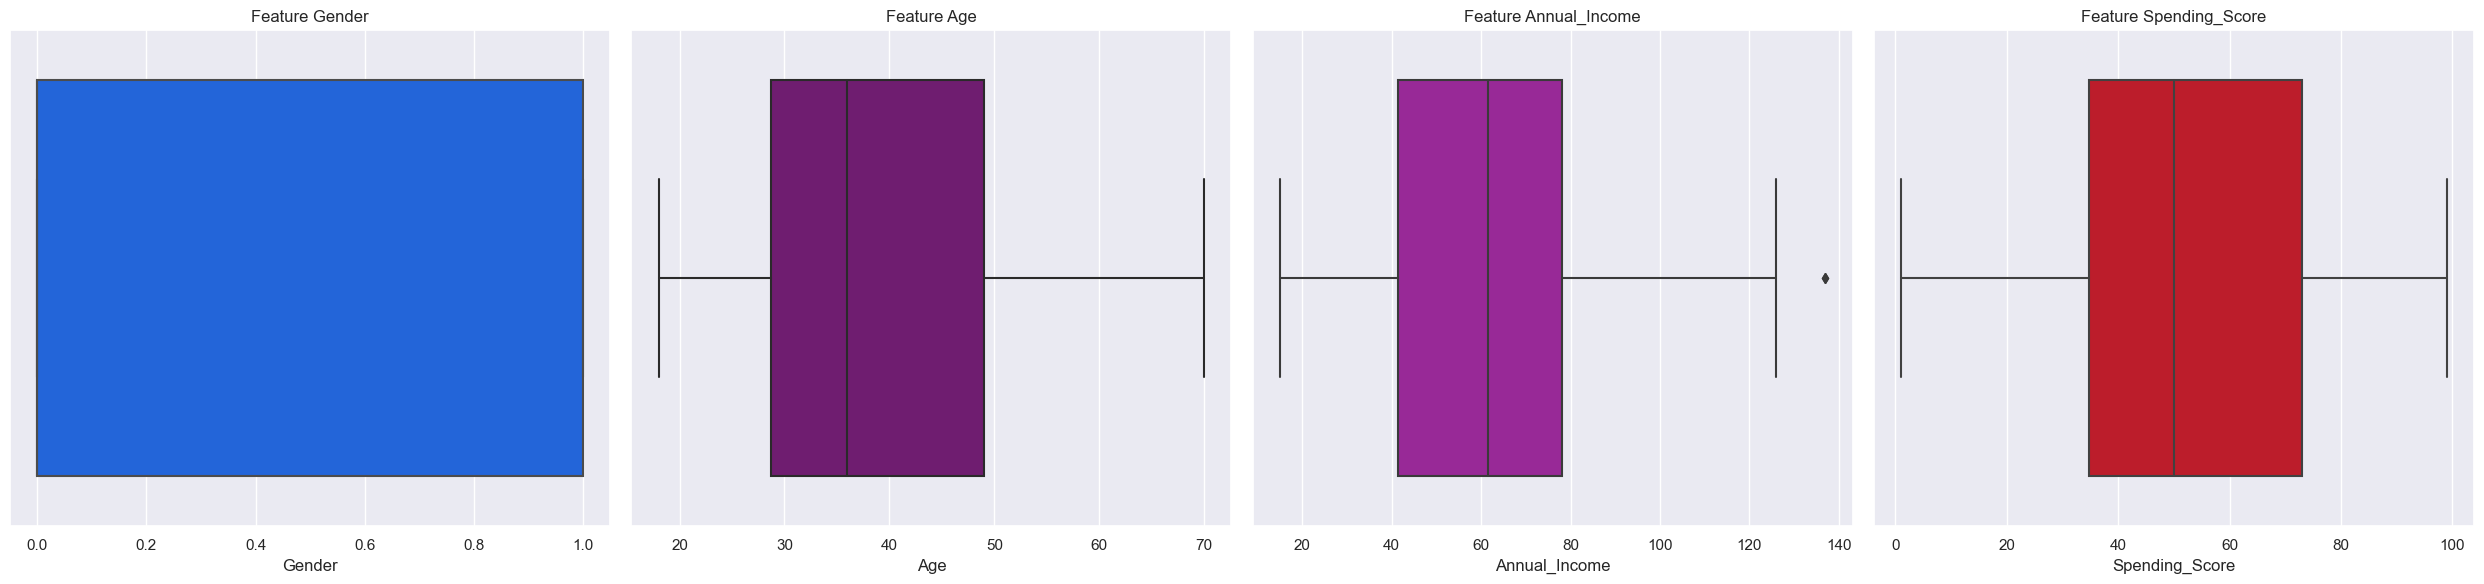

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(25, 6))
axes = axes.flatten()
sns.set(style='whitegrid')  
for i, feature in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[feature]):
        x_data = df[feature]
    sns.boxplot(x=x_data, ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Feature {feature}')

plt.tight_layout()
plt.show()

In [126]:
numeric_columns = ['Age', 'Annual_Income', 'Spending_Score']
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
df = df[~outliers]

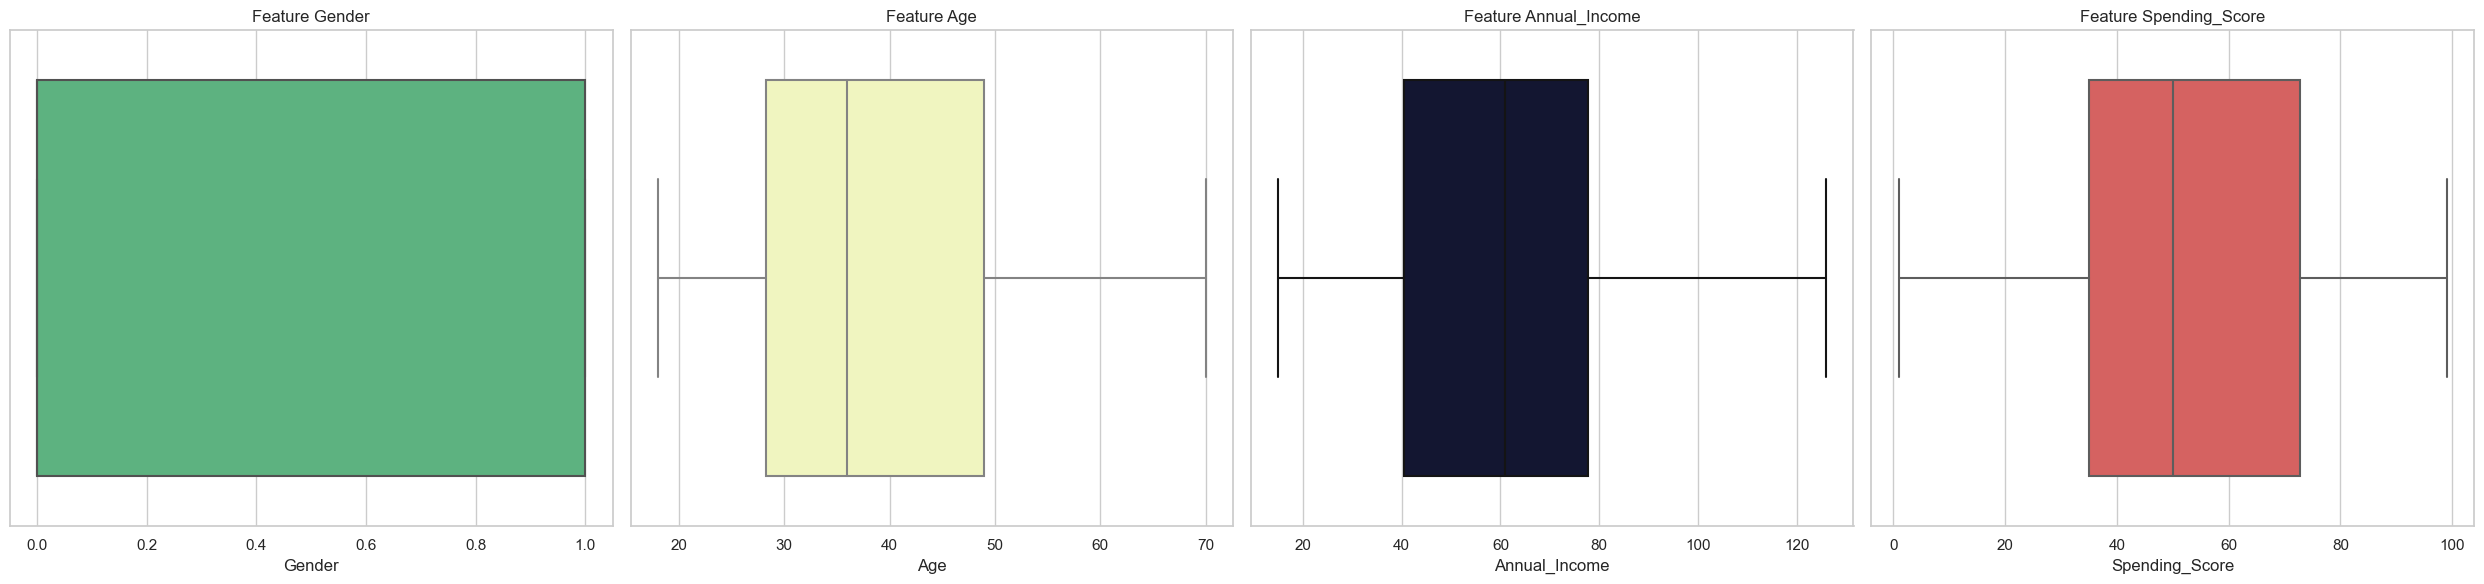

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(25, 6))
axes = axes.flatten()
sns.set(style='whitegrid')  
for i, feature in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[feature]):
        x_data = df[feature]
    sns.boxplot(x=x_data, ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Feature {feature}')

plt.tight_layout()
plt.show()

In [128]:
X = df.iloc[:, 2:].values  
scaler = StandardScaler()
X = scaler.fit_transform(X)

Cost_Function= 396.0 with 1 Clusters
Cost_Function= 264.11936526502575 with 2 Clusters
Cost_Function= 156.23784749493416 with 3 Clusters
Cost_Function= 106.14889229714831 with 4 Clusters
Cost_Function= 61.08666097712002 with 5 Clusters
Cost_Function= 52.43045903120664 with 6 Clusters
Cost_Function= 43.779926772455156 with 7 Clusters
Cost_Function= 35.78705968962805 with 8 Clusters
Cost_Function= 30.956489367948066 with 9 Clusters
Cost_Function= 27.796164162229744 with 10 Clusters


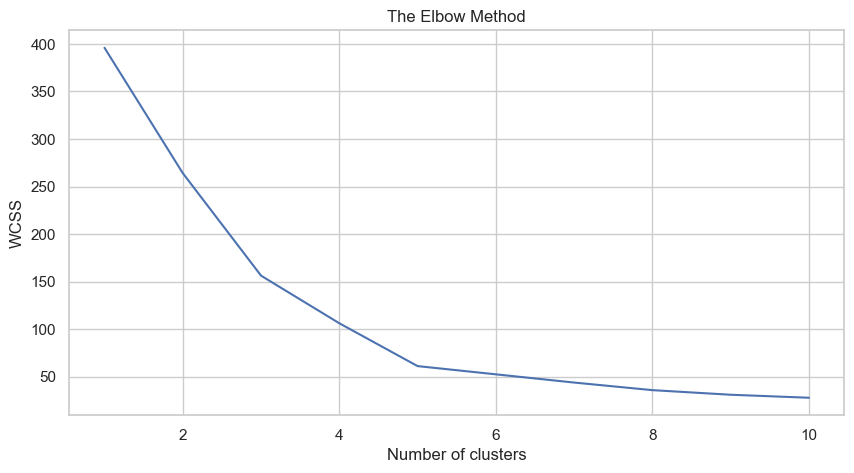

In [129]:
wcss = []            
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=100)
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [130]:
kmeans = KMeans(n_clusters=5,init = 'k-means++', n_init=100, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

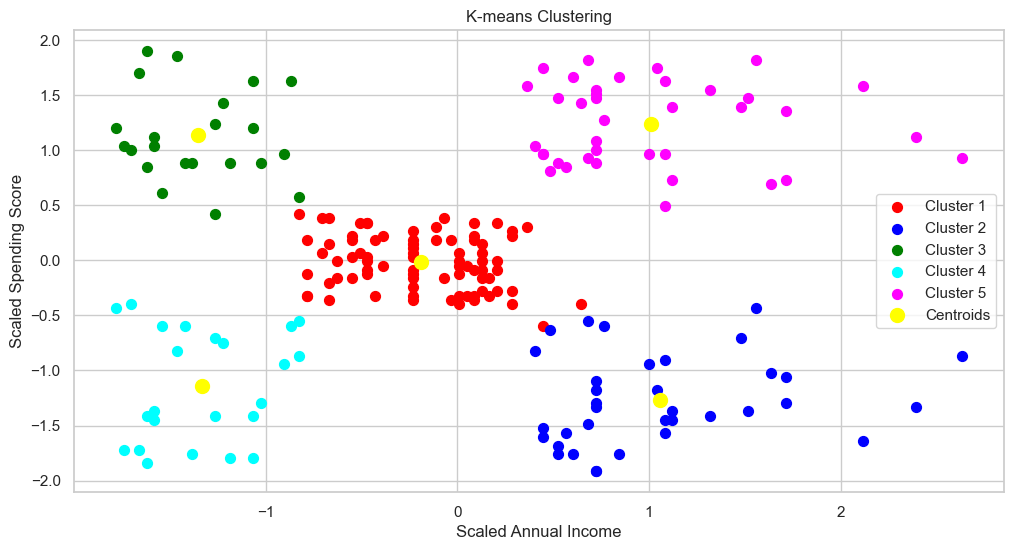

In [131]:
plt.figure(figsize=(12, 6))
plt.scatter(X[kmeans_labels == 0, 0], X[kmeans_labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[kmeans_labels == 1, 0], X[kmeans_labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[kmeans_labels == 2, 0], X[kmeans_labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[kmeans_labels == 3, 0], X[kmeans_labels == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[kmeans_labels == 4, 0], X[kmeans_labels == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


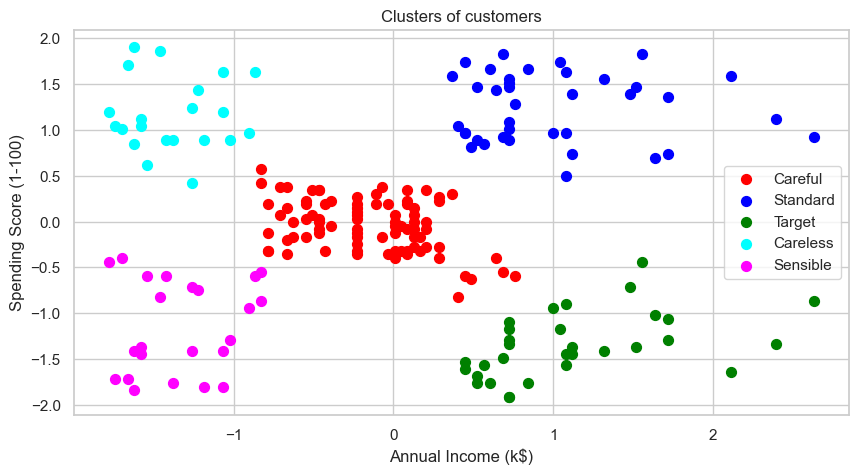

In [132]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()